In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA, TruncatedSVD
import matplotlib.patches as mpatches
import time

# Classifier Libraries
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import collections


# Other Libraries
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from imblearn.pipeline import make_pipeline as imbalanced_make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import NearMiss
from imblearn.metrics import classification_report_imbalanced
from sklearn.metrics import precision_score, recall_score, f1_score, roc_auc_score, accuracy_score, classification_report
from collections import Counter
from sklearn.model_selection import KFold, StratifiedKFold
import warnings
warnings.filterwarnings("ignore")


df = pd.read_csv('/content/drive/My Drive/ML Project Taxi Fair/train.csv')
df.head()

,tripid,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pickup_time,drop_time,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,189123628,10.5,834.0,56.0,0.0000,64.0,11/1/2019 0:20,11/1/2019 0:34,6.86252,79.8993,6.90330,79.8783,270.32,correct
1,189125358,10.5,791.0,47.0,0.0000,134.0,11/1/2019 0:56,11/1/2019 1:09,6.88589,79.8984,6.91373,79.8923,197.85,correct
2,189125719,10.5,1087.0,80.0,0.0000,61.0,11/1/2019 1:08,11/1/2019 1:26,6.90839,79.8651,6.93669,79.9146,301.64,correct
3,189127273,10.5,598.0,271.0,15.6638,68.0,11/1/2019 2:27,11/1/2019 2:37,6.92570,79.8895,6.92748,79.8971,82.30,correct
4,189128020,NaN,NaN,NaN,NaN,NaN,11/1/2019 3:34,11/1/2019 3:51,6.87441,79.8615,6.84478,79.9290,358.39,correct


In [ ]:
#Drop the NaN and tripid
df.drop(columns=['tripid'], inplace=True)

df.dropna(subset=['additional_fare','duration','meter_waiting','meter_waiting_fare','meter_waiting_till_pickup','fare'], inplace=True)

#Convert labels for 1 and 0
#Before do describe, Let's convert the label as 1 and 0 .(1-correct and 0-incorrect)
def encoding_label(label):
  if(label=='correct'):
    return 1
  else:
    return 0

df['label']= df['label'].apply(encoding_label).values

In [ ]:
#Drop pickuptime and droptime
df.drop(columns=['pickup_time','drop_time'], inplace=True)

In [ ]:
df.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,10.5,834.0,56.0,0.0000,64.0,6.86252,79.8993,6.90330,79.8783,270.32,1
1,10.5,791.0,47.0,0.0000,134.0,6.88589,79.8984,6.91373,79.8923,197.85,1
2,10.5,1087.0,80.0,0.0000,61.0,6.90839,79.8651,6.93669,79.9146,301.64,1
3,10.5,598.0,271.0,15.6638,68.0,6.92570,79.8895,6.92748,79.8971,82.30,1
5,10.5,3407.0,182.0,0.0000,112.0,7.13402,79.8969,6.91865,79.8649,1065.02,1


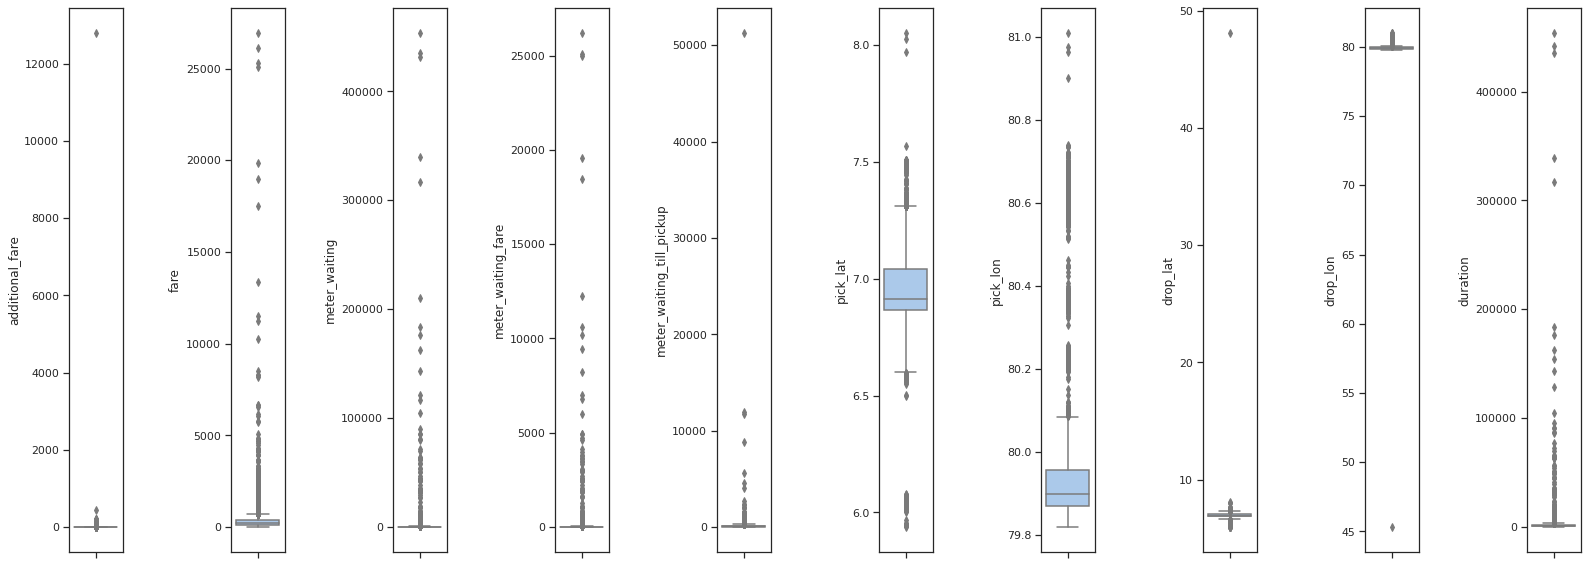

In [ ]:
f, ax = plt.subplots(1,10, figsize=(10,10),)
data_frame = df
plt.subplots_adjust(left=0.9, bottom=None, right=3, top=None, wspace=2, hspace=2)
sns.set(style="ticks", palette="pastel")
sns.boxplot(data_frame['additional_fare'],ax=ax[0], orient='v')
sns.boxplot(data_frame['fare'],ax=ax[1], orient='v')
sns.boxplot(data_frame['meter_waiting'],ax=ax[2], orient='v')
sns.boxplot(data_frame['meter_waiting_fare'],ax=ax[3], orient='v')
sns.boxplot(data_frame['meter_waiting_till_pickup'],ax=ax[4], orient='v')
sns.boxplot(data_frame['pick_lat'],ax=ax[5], orient='v')
sns.boxplot(data_frame['pick_lon'],ax=ax[6], orient='v')
sns.boxplot(data_frame['drop_lat'],ax=ax[7], orient='v')
sns.boxplot(data_frame['drop_lon'],ax=ax[8], orient='v')
sns.boxplot(data_frame['duration'],ax=ax[9], orient='v')
plt.show()

Text(0.5, 1.0, 'Additional Fair')

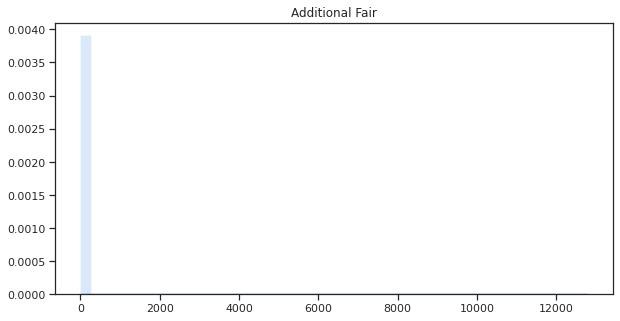

In [ ]:
#First start with the Additional Fare
#It has one outlier far from normal points

#Plot the Additional Faire data
f, ax = plt.subplots(1,1, figsize=(10,5))
sns.distplot(df['additional_fare'].values, ax=ax)
ax.set_title("Additional Fair")

In [ ]:
#Check the min max q1 q2 stats
data_frame['additional_fare'].describe()

count    16968.000000
mean        13.721437
std         98.992493
min          0.000000
25%         10.500000
50%         10.500000
75%         10.500000
max      12795.030000
Name: additional_fare, dtype: float64

In [ ]:
#The datapoint with values 12795.03 is a outlier
#Find the index and remove it
data_frame[data_frame.additional_fare > 2000]

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
14043,12795.03,40.0,210164.0,12252.5612,182.0,7.15515,79.8718,7.15537,79.8799,25097.59,0


In [ ]:
#Delete the index 14043
data_frame.drop([14043], inplace=True)

In [ ]:
#Check it for make sure I removed te 14043
data_frame[data_frame.additional_fare > 2000]

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,label


Text(0.5, 1.0, 'Additional Fair')

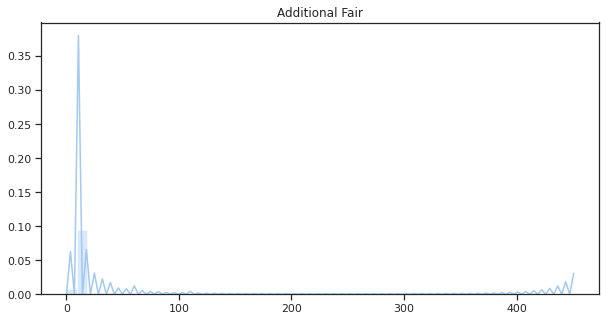

In [ ]:
#Then plot the rest of te Additional Data 
#First start with the Additional Fare
#It has one outlier far from normal points

#Plot the Additional Faire data
f, ax = plt.subplots(1,1, figsize=(10,5))
sns.distplot(data_frame['additional_fare'].values, ax=ax)
ax.set_title("Additional Fair")

Text(0.5, 1.0, 'Additional Fair with np Log function transform')

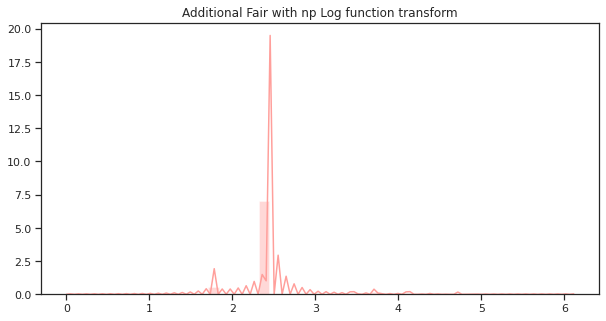

In [ ]:
#This had 0 values, log(0) is undefined . The I had to add 1 to all the values
#Try to plot this with Log Scale for more standard distribution
f, ax = plt.subplots(1,1, figsize=(10,5))
sns.distplot(np.log(data_frame['additional_fare']+1).values, ax=ax, color='r')
ax.set_title("Additional Fair with np Log function transform")

Text(0.5, 1.0, 'Additional Fair after NP LOG transform')

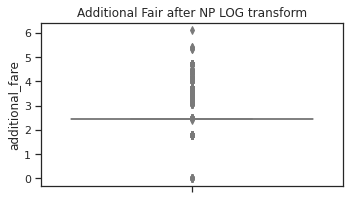

In [ ]:
#Seems ok with np.log . Lets plot box plot of te distribution
f, ax = plt.subplots(1,1, figsize=(2,3))
data_frame = df
plt.subplots_adjust(left=0.9, bottom=None, right=3, top=None, wspace=2, hspace=2)
#sns.set(style="ticks", palette="pastel")
sns.boxplot(np.log(data_frame['additional_fare']+1),ax=ax, orient='v')
ax.set_title('Additional Fair after NP LOG transform')

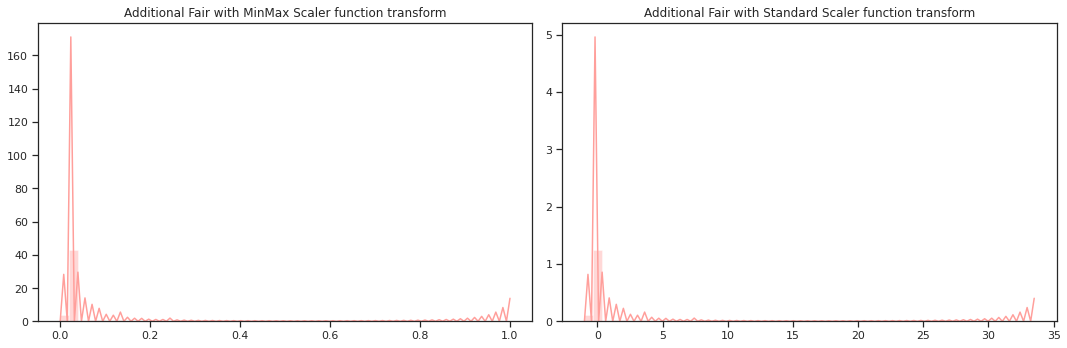

In [ ]:
#Try with the Standard scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

scaler1.fit(data_frame['additional_fare'].values.reshape(-1,1))
scaler2.fit(data_frame['additional_fare'].values.reshape(-1,1))
#This had 0 values, log(0) is undefined . The I had to add 1 to all the values
#Try to plot this with Log Scale for more standard distribution
f, ax = plt.subplots(1,2, figsize=(15,5))
sns.distplot(scaler1.transform(data_frame['additional_fare'].values.reshape(-1,1)), ax=ax[0], color='r')
ax[0].set_title("Additional Fair with MinMax Scaler function transform")

sns.distplot(scaler2.transform(data_frame['additional_fare'].values.reshape(-1,1)), ax=ax[1], color='r')
ax[1].set_title("Additional Fair with Standard Scaler function transform")

plt.tight_layout()


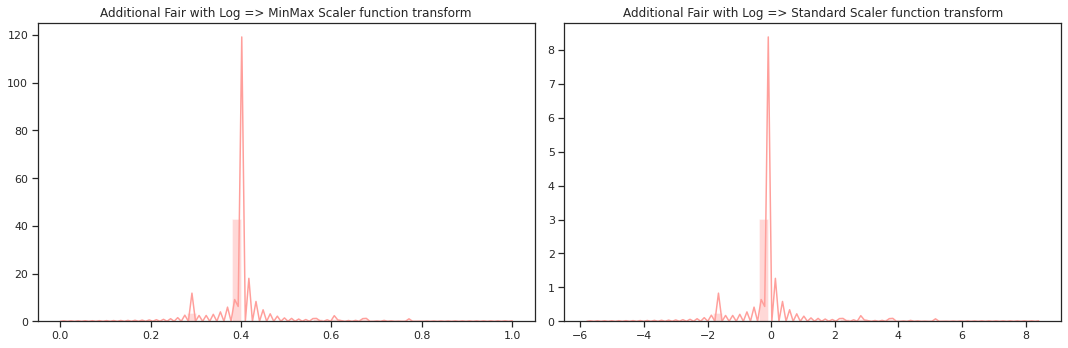

In [ ]:
#Try with the Standard scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

scaler1.fit(np.log((data_frame['additional_fare']+1).values).reshape(-1, 1))
scaler2.fit(np.log((data_frame['additional_fare']+1).values).reshape(-1, 1))

#This had 0 values, log(0) is undefined . The I had to add 1 to all the values
#Try to plot this with Log Scale for more standard distribution
f, ax = plt.subplots(1,2, figsize=(15,5))
sns.distplot(scaler1.transform(np.log((data_frame['additional_fare']+1).values).reshape(-1, 1)), ax=ax[0], color='r')
ax[0].set_title("Additional Fair with Log => MinMax Scaler function transform")

sns.distplot(scaler2.transform(np.log((data_frame['additional_fare']+1).values).reshape(-1, 1)), ax=ax[1], color='r')
ax[1].set_title("Additional Fair with Log => Standard Scaler function transform")

plt.tight_layout()


Text(0.5, 1.0, 'Drop Latitude')

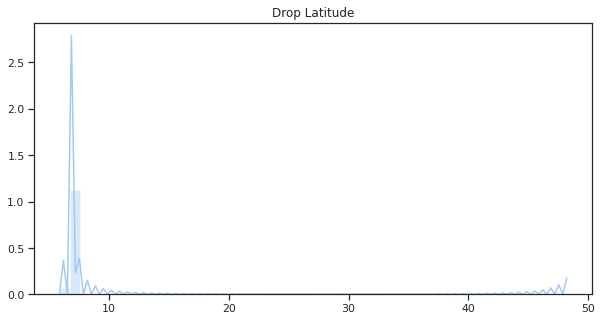

In [ ]:
#First start with the Drop Latitude Fare
#It has one outlier far from normal points

#Plot the Additional Faire data
f, ax = plt.subplots(1,1, figsize=(10,5))
sns.distplot(df['drop_lat'].values, ax=ax)
ax.set_title("Drop Latitude")

In [ ]:
#Check the min max q1 q2 stats
data_frame['drop_lat'].describe()

count    16967.000000
mean         6.968267
std          0.380261
min          5.941860
25%          6.865580
50%          6.915930
75%          7.046540
max         48.132000
Name: drop_lat, dtype: float64

In [ ]:
#The datapoint with values 48.132000 is a outlier
#Find the index and remove it
data_frame[data_frame.drop_lat > 40]

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
920,10.5,313.0,50.0,2.915,98.0,7.46897,80.6227,48.132,45.3077,63.41,1


In [ ]:
#Delete the index 920
data_frame.drop([920], inplace=True)

In [ ]:
#Check it for make sure I removed te 14043
data_frame[data_frame.drop_lat > 40]

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,label


Text(0.5, 1.0, 'Drop Latitude after remove outlier point')

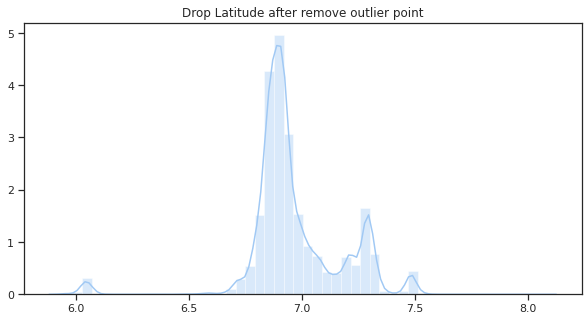

In [ ]:
#Then plot the rest of te Additional Data 
#First start with the drop latitude
#It has one outlier far from normal points

#Plot the Additional Faire data
f, ax = plt.subplots(1,1, figsize=(10,5))
sns.distplot(data_frame['drop_lat'].values, ax=ax)
ax.set_title("Drop Latitude after remove outlier point")

Text(0.5, 1.0, 'Drop Latitude with np Log function transform')

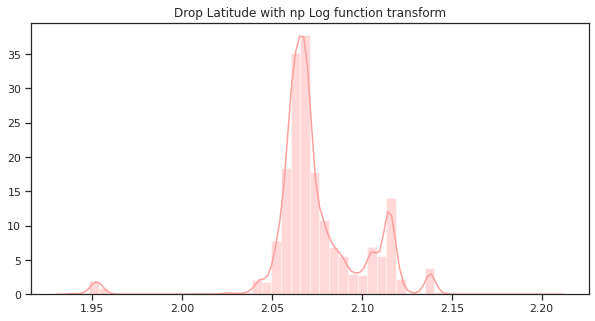

In [ ]:
#This had 0 values, log(0) is undefined . The I had to add 1 to all the values
#Try to plot this with Log Scale for more standard distribution
f, ax = plt.subplots(1,1, figsize=(10,5))
sns.distplot(np.log(data_frame['drop_lat']+1).values, ax=ax, color='r')
ax.set_title("Drop Latitude with np Log function transform")

Text(0.5, 1.0, 'Drop Latitude after NP LOG transform')

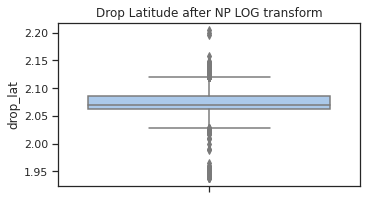

In [ ]:
#Seems ok with np.log . Lets plot box plot of te distribution
f, ax = plt.subplots(1,1, figsize=(2,3))
data_frame = df
plt.subplots_adjust(left=0.9, bottom=None, right=3, top=None, wspace=2, hspace=2)
#sns.set(style="ticks", palette="pastel")
sns.boxplot(np.log(data_frame['drop_lat']+1),ax=ax, orient='v')
ax.set_title('Drop Latitude after NP LOG transform')

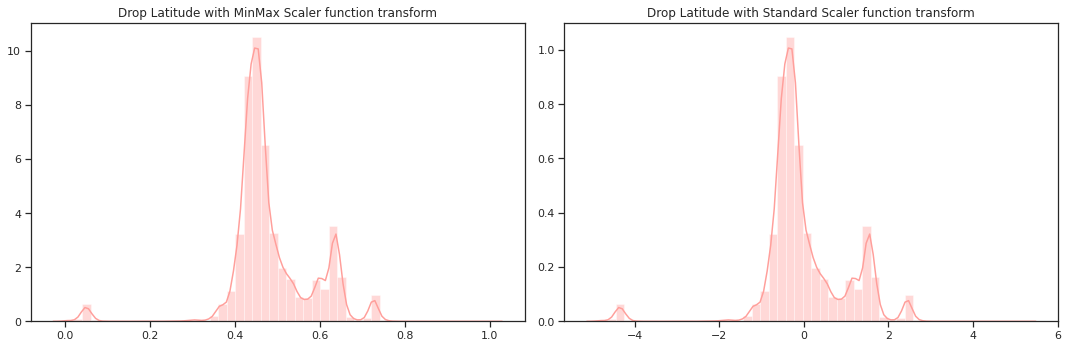

In [ ]:
#Try with the Standard scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

scaler1.fit(data_frame['drop_lat'].values.reshape(-1,1))
scaler2.fit(data_frame['drop_lat'].values.reshape(-1,1))
#This had 0 values, log(0) is undefined . The I had to add 1 to all the values
#Try to plot this with Log Scale for more standard distribution
f, ax = plt.subplots(1,2, figsize=(15,5))
sns.distplot(scaler1.transform(data_frame['drop_lat'].values.reshape(-1,1)), ax=ax[0], color='r')
ax[0].set_title("Drop Latitude with MinMax Scaler function transform")

sns.distplot(scaler2.transform(data_frame['drop_lat'].values.reshape(-1,1)), ax=ax[1], color='r')
ax[1].set_title("Drop Latitude with Standard Scaler function transform")

plt.tight_layout()


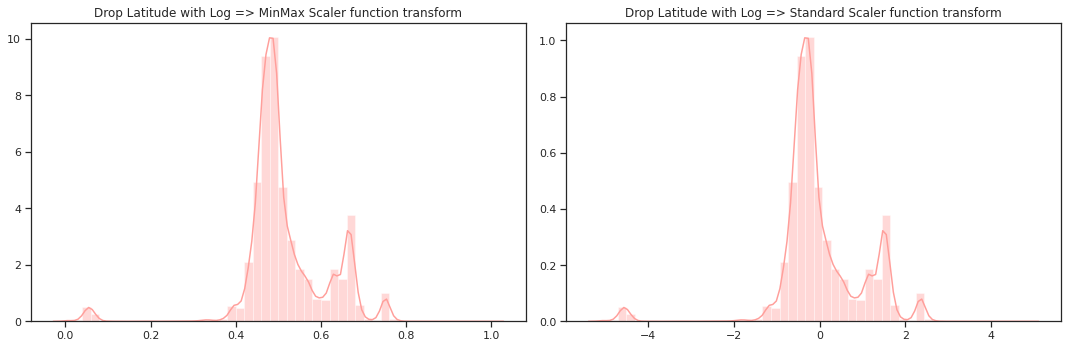

In [ ]:
#Try with the Standard scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

scaler1.fit(np.log((data_frame['drop_lat']+1).values).reshape(-1, 1))
scaler2.fit(np.log((data_frame['drop_lat']+1).values).reshape(-1, 1))

#This had 0 values, log(0) is undefined . The I had to add 1 to all the values
#Try to plot this with Log Scale for more standard distribution
f, ax = plt.subplots(1,2, figsize=(15,5))
sns.distplot(scaler1.transform(np.log((data_frame['drop_lat']+1).values).reshape(-1, 1)), ax=ax[0], color='r')
ax[0].set_title("Drop Latitude with Log => MinMax Scaler function transform")

sns.distplot(scaler2.transform(np.log((data_frame['drop_lat']+1).values).reshape(-1, 1)), ax=ax[1], color='r')
ax[1].set_title("Drop Latitude with Log => Standard Scaler function transform")

plt.tight_layout()


In [ ]:
#There were several columns that have few outliers.
#I will remove those by just looking the limit
#Find the index and remove it

#Drop Longitude
data_frame.drop(data_frame[data_frame.drop_lon  < 50].index.values,inplace=True)

#meter_waiting_till_pickup
data_frame.drop(data_frame[data_frame.meter_waiting_till_pickup  > 10000].index.values,inplace=True)

In [ ]:
data_frame.to_csv("/content/drive/My Drive/ML Project Taxi Fair/Outlier_Rmoved_with_drop_nan_train.csv", index=False)

Text(0.5, 1.0, 'Meter Waiting till pickup after remove outlier point')

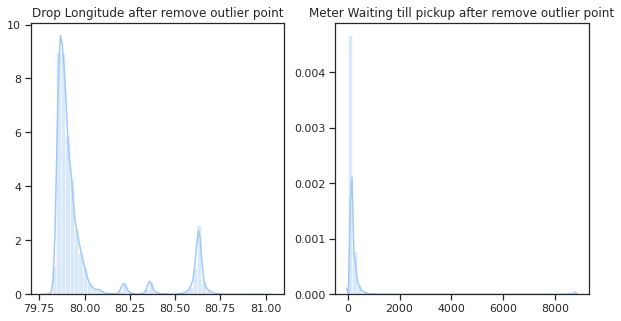

In [ ]:
#Plot these two features 

#Plot drop longitude and meter_waiting_till_pickup distributions

f, ax = plt.subplots(1,2, figsize=(10,5))

sns.distplot(data_frame['drop_lon'].values, ax=ax[0])
ax[0].set_title("Drop Longitude after remove outlier point")

sns.distplot(data_frame['meter_waiting_till_pickup'].values, ax=ax[1])
ax[1].set_title("Meter Waiting till pickup after remove outlier point")

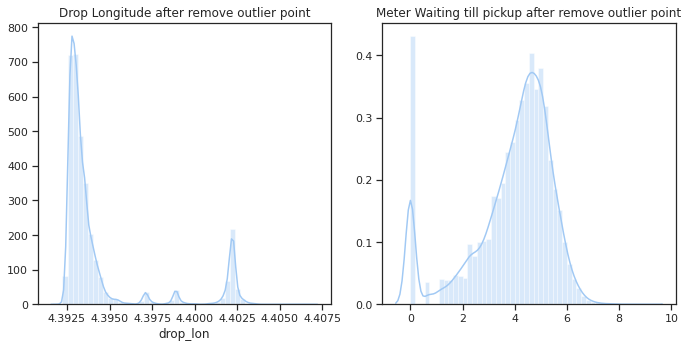

In [ ]:
#Plot dro_lat and meter_waiting_till_pickup after log transform


f, ax = plt.subplots(1,2, figsize=(10,5))

sns.distplot(np.log(data_frame['drop_lon']+1), ax=ax[0])
ax[0].set_title("Drop Longitude after remove outlier point")

sns.distplot(np.log(data_frame['meter_waiting_till_pickup']+1).values, ax=ax[1])
ax[1].set_title("Meter Waiting till pickup after remove outlier point")

plt.tight_layout()

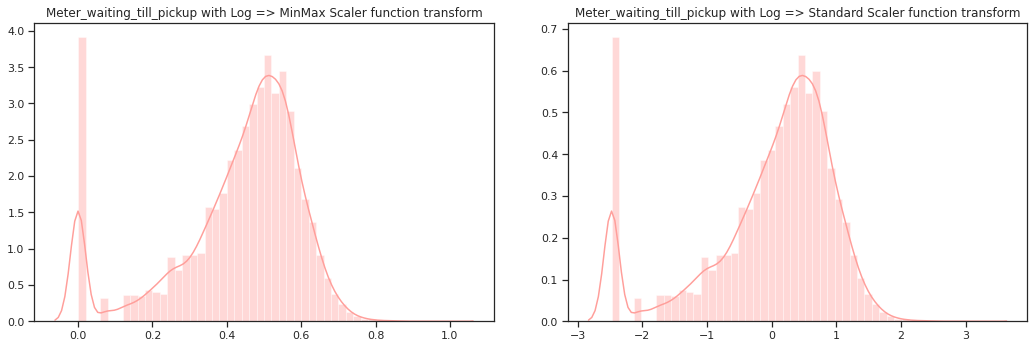

In [ ]:
#Try with the Standard scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

scaler1.fit(np.log((data_frame['meter_waiting_till_pickup']+1).values).reshape(-1, 1))
scaler2.fit(np.log((data_frame['meter_waiting_till_pickup']+1).values).reshape(-1, 1))

#This had 0 values, log(0) is undefined . The I had to add 1 to all the values
#Try to plot this with Log Scale for more standard distribution
f, ax = plt.subplots(1,2, figsize=(15,5))
sns.distplot(scaler1.transform(np.log((data_frame['meter_waiting_till_pickup']+1).values).reshape(-1, 1)), ax=ax[0], color='r')
ax[0].set_title("Meter_waiting_till_pickup with Log => MinMax Scaler function transform")

sns.distplot(scaler2.transform(np.log((data_frame['meter_waiting_till_pickup']+1).values).reshape(-1, 1)), ax=ax[1], color='r')
ax[1].set_title("Meter_waiting_till_pickup with Log => Standard Scaler function transform")

plt.tight_layout()


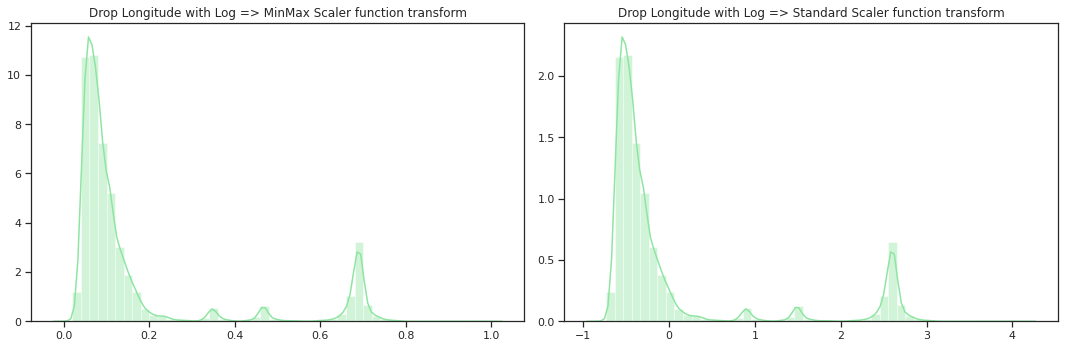

In [ ]:
#Try with the Standard scaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()
scaler2 = StandardScaler()

scaler1.fit(np.log((data_frame['drop_lon']+1).values).reshape(-1, 1))
scaler2.fit(np.log((data_frame['drop_lon']+1).values).reshape(-1, 1))

#This had 0 values, log(0) is undefined . The I had to add 1 to all the values
#Try to plot this with Log Scale for more standard distribution
f, ax = plt.subplots(1,2, figsize=(15,5))
sns.distplot(scaler1.transform(np.log((data_frame['drop_lon']+1).values).reshape(-1, 1)), ax=ax[0], color='g')
ax[0].set_title("Drop Longitude with Log => MinMax Scaler function transform")

sns.distplot(scaler2.transform(np.log((data_frame['drop_lon']+1).values).reshape(-1, 1)), ax=ax[1], color='g')
ax[1].set_title("Drop Longitude with Log => Standard Scaler function transform")

plt.tight_layout()


In [ ]:
#From now .I try to transform every column to np.log => MinMax Scaler

new_dt = {}

for column in data_frame.drop(columns=['label']).columns:
  values = np.log((data_frame[column]+1).values).reshape(-1, 1)

  scaler1 = StandardScaler()
  scaler1.fit(np.log((data_frame[column]+1).values).reshape(-1, 1))
  values = scaler1.transform(np.log((data_frame[column]+1).values).reshape(-1, 1))
  values = [x[0] for x in values]
  new_dt[column] = values

new_df = pd.DataFrame(new_dt)

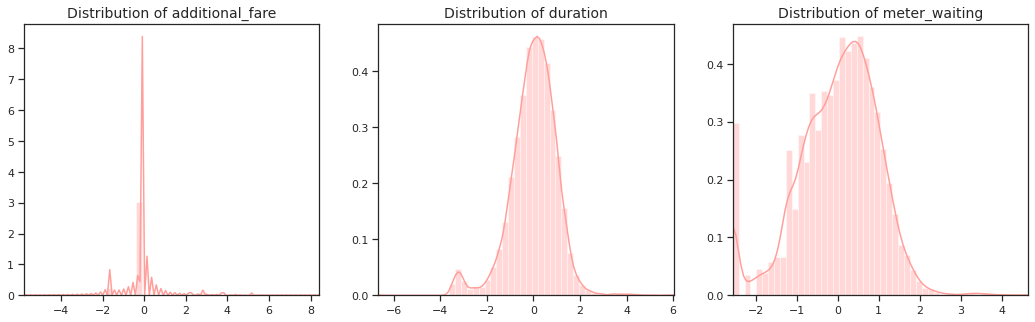

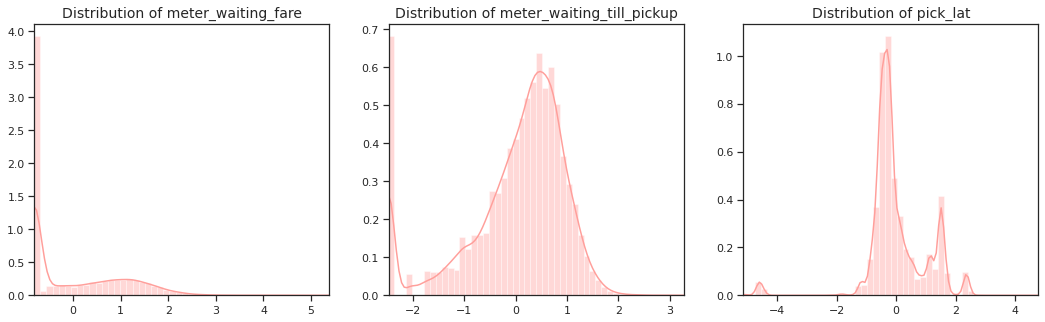

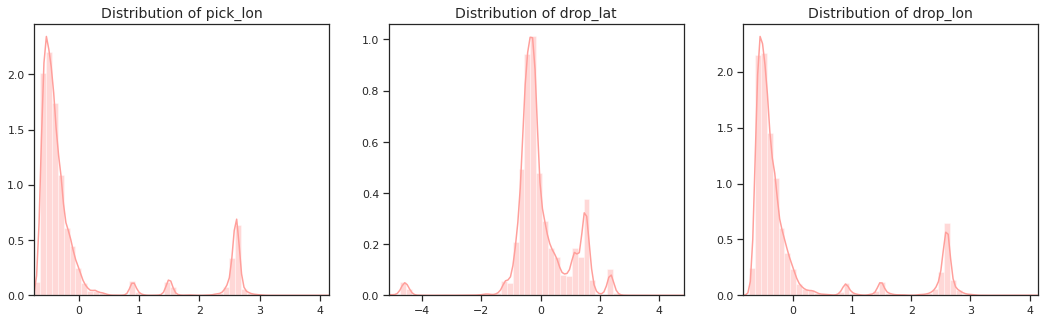

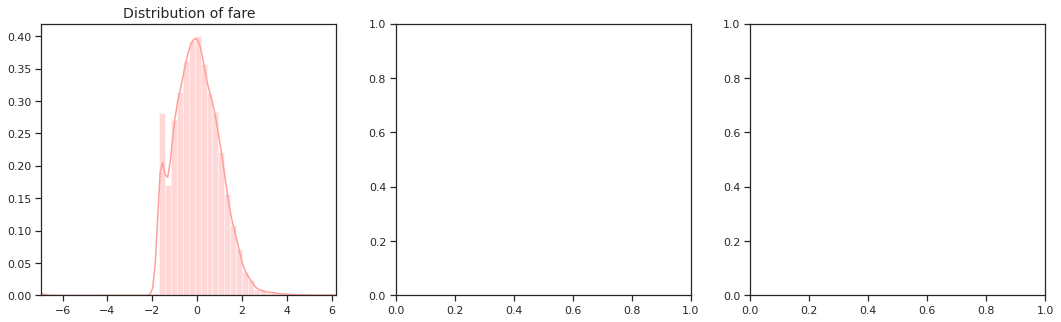

In [ ]:
#Plot new Distributions
columns = new_df.columns
for idx in range(0,12,3):
  fig, (ax) = plt.subplots(1, 3, figsize=(18,5))

  for k in range(0,3):
    if(idx+k==10):
      break
    _val = new_df[columns[idx+k]].values

    sns.distplot(_val, ax=ax[k], color='r')
    ax[k].set_title('Distribution of {0}'.format(columns[idx+k]), fontsize=14)
    ax[k].set_xlim([min(_val), max(_val)])

plt.show()

In [ ]:
X = new_df.values
Y = data_frame['label'].values
X_train, X_validation, Y_train, Y_validation = train_test_split(X, Y, test_size=0.20, random_state=1)

In [ ]:
#Save outiers removed data as csv
new_df.insert(new_df.shape[1], 'label', Y)

In [ ]:
new_df.head()

,additional_fare,duration,meter_waiting,meter_waiting_fare,meter_waiting_till_pickup,pick_lat,pick_lon,drop_lat,drop_lon,fare,label
0,-0.118504,-0.113348,-0.324035,-0.816775,0.169336,-0.471552,-0.406432,-0.280701,-0.497752,0.273534,1
1,-0.118504,-0.164826,-0.419184,-0.816775,0.632227,-0.360624,-0.410154,-0.231547,-0.439881,-0.127440,1
2,-0.118504,0.144345,-0.129474,-0.816775,0.139409,-0.254136,-0.547916,-0.123570,-0.347722,0.414498,1
3,-0.118504,-0.436769,0.541224,0.898739,0.207157,-0.172417,-0.446968,-0.166846,-0.420042,-1.250176,1
4,-0.118504,1.256055,0.321793,-0.816775,0.519566,0.797279,-0.416359,-0.208383,-0.553153,2.039233,1
